# Libraries

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Typing
from typing import List

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, KFold

# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    ConfusionMatrixDisplay,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## 1 Loading The Data Pipeline

In [2]:
# Data Collection
df = pd.read_csv('C:/Users/Nadir/Desktop/satisfaction.csv')

# List of columns to fill missing values
columns_to_fill = ['Flight Distance', 'Inflight service', 'Cleanliness', 'Arrival Delay in Minutes']
# Alternatively, you can do it in a more concise way using the `apply` method
df[columns_to_fill] = df[columns_to_fill].apply(lambda x: x.fillna(int(x.mean())))

# List of satisfaaction columns
columns_to_tweak = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Inflight service', 'Cleanliness']
# Iterate over each column and set values to 3 where the value is 0
for column in columns_to_tweak:
    df.loc[df[column] == 0, column] = 3

# Drop rows where any value is missing
df = df.dropna()
columns_to_drop = ['Unnamed: 0', 'id']
df = df.drop(columns=columns_to_drop)

# Override 'Departure Delay in Minutes' with 'Total Delay'
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']
df.rename(columns={'Departure Delay in Minutes': 'Total Delay'}, inplace=True)
# Drop 'Arrival Delay in Minutes' column
df.drop(columns=['Arrival Delay in Minutes'], inplace=True)

# Initialize the LabelEncoder
encoder = LabelEncoder()
# Encode binary columns
binary_columns = ['Gender', 'Customer Type', 'Type of Travel', 'satisfaction']
for column in binary_columns:
    df[column] = encoder.fit_transform(df[column])

# Define the order of classes for ordinal encoding
class_order = ['Eco', 'Eco Plus', 'Business']
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[class_order])
# Fit and transform the 'Class' column
df['Class'] = ordinal_encoder.fit_transform(df[['Class']])
# Convert encoded values to integer type
df['Class'] = df['Class'].astype(int)

# Extract the other column names (excluding the last one)
columns_to_scale = df.columns[:-1]
# Initialize the StandardScaler
scaler = StandardScaler()
# Standard scale the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay,satisfaction
0,-0.985344,-0.475348,0.817874,-0.664253,-1.077964,-1.043130,1.756919,0.587624,0.083904,0.798600,...,-0.341221,1.227170,1.259165,1.261068,1.162371,-1.034961,1.149963,1.302583,0.876484,1
1,-0.985344,-0.475348,-0.239923,-0.664253,1.001932,1.688678,-1.462277,-1.628957,0.083904,-1.541788,...,1.173810,0.480031,0.478608,0.490583,0.312703,-0.247179,0.301451,1.302583,-0.391302,1
2,1.014874,2.103723,-1.297721,-0.664253,-1.077964,-1.010789,-0.657478,-0.151236,-0.699404,0.798600,...,-1.098737,-1.014246,0.478608,-1.820871,-0.536964,-1.034961,-1.395575,-0.975655,-0.391302,0
3,1.014874,-0.475348,0.288975,-0.664253,1.001932,2.208156,0.147321,-0.151236,0.083904,-0.761659,...,0.416295,-1.761385,-1.863064,-1.820871,-2.236298,-0.247179,-2.244087,0.543170,-0.310380,1
4,-0.985344,-0.475348,0.619537,-0.664253,-1.077964,-0.010238,-0.657478,-0.151236,0.867212,0.018471,...,-1.098737,-1.014246,-1.082507,-1.050386,-1.386631,0.540602,-1.395575,0.543170,-0.121561,1


## 2 Data Splitting

In [3]:
# Assuming df is your DataFrame
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable (assuming the last column is the target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=29, stratify=y)

## 3 Model Selection

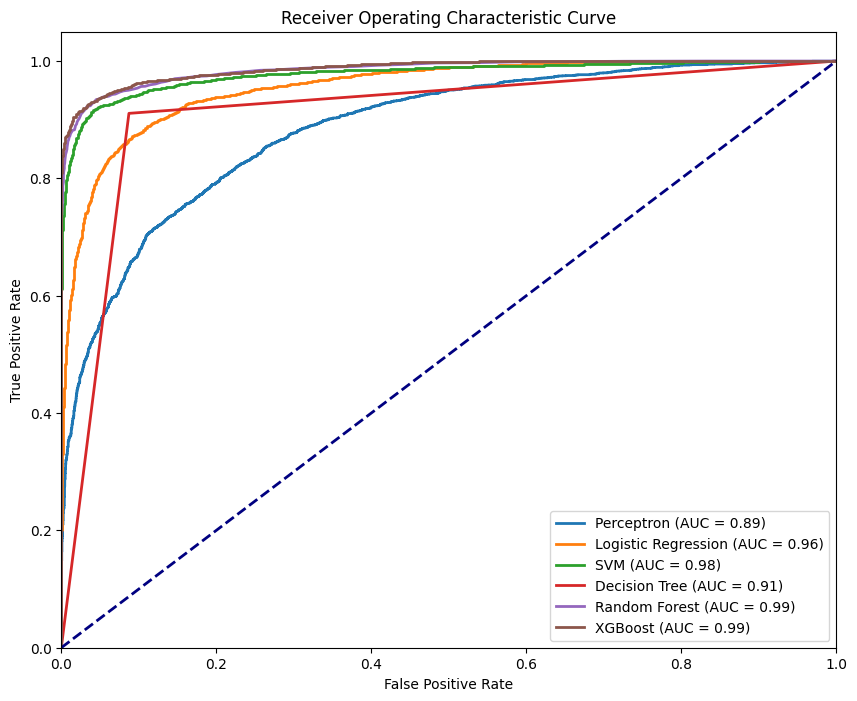

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Perceptron,0.831265,0.804303,0.835866,0.689223,0.755495,0.885634
1,Logistic Regression,0.881211,0.888959,0.870384,0.877551,0.873953,0.955954
2,SVM,0.931313,0.938747,0.949159,0.909058,0.928676,0.977867
3,Decision Tree,0.906707,0.911889,0.890756,0.910849,0.900690,0.911776
4,Random Forest,0.938851,0.946443,0.959520,0.916577,0.937557,0.985081
5,XGBoost,0.944715,0.947856,0.957265,0.922306,0.939460,0.986785


In [4]:
def evaluate_models(X_train, y_train, X_test, y_test) -> pd.DataFrame:
    """  
    Evaluate different classification models and compare their performance.

    Parameters:
    X_train (array-like): Training features.
    y_train (array-like): Training labels.
    X_test (array-like): Testing features.
    y_test (array-like): Testing labels.

    Returns:
    pd.DataFrame: A DataFrame containing model names, training and testing performance metrics, and standard deviations.
    """

    # Initialize models
    models = [
        ('Perceptron', Perceptron()),
        ('Logistic Regression', LogisticRegression()),
        ('SVM', SVC()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('XGBoost', XGBClassifier())
    ]

    # Initialize result DataFrame
    result = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])

    # Plot ROC for all models
    plt.figure(figsize=(10, 8))
    for model_name, model in models:
        # Cross-validation
        kfold = StratifiedKFold(n_splits=5)
        cross_val_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

        # Train the model with class weights
        model.fit(X_train, y_train)
        
        # Test the model
        predictions   = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, predictions)
        precision     = precision_score(y_test, predictions, zero_division=0)
        recall        = recall_score(y_test, predictions)
        f1            = f1_score(y_test, predictions)
        
        # Check if the model has predict_proba method
        if hasattr(model, 'predict_proba'):
            prob_pos = model.predict_proba(X_test)[:, 1]  # Probability of positive class
        else:  # If not, use decision_function
            prob_pos = model.decision_function(X_test)

        roc_auc = roc_auc_score(y_test, prob_pos)  # Calculate ROC-AUC
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, prob_pos)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

        # Store results
        result.loc[len(result)] = [model_name, cross_val_result.mean(), test_accuracy, precision, recall, f1, roc_auc]
    
    # Plot settings
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()

    return result

evaluate_models(X_train, y_train, X_test, y_test)

Random Forest it is!
## 4 Model Tuning (Random Forest)
There are 3 types of parameters:
1. Global parameters
2. Booster parameters
3. Learning Task parameters

In [5]:
# Initialize a Random Forest Classifier
rfc_model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize Stratified K-Fold cross-validation
kfold = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv=kfold, scoring='precision', verbose=2, n_jobs=-1)
grid_search.fit(X_train,y_train)

# Access the best estimator directly
best_estimator_params = grid_search.best_estimator_.get_params()
best_estimator_params

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


C:\Users\Nadir\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1003 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nadir\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nadir\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Nadir\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Nadir\anaconda3\Lib\site-pac

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# Now you can create a new RandomForestClassifier using the best parameters
best_rfc_model = RandomForestClassifier(**best_estimator_params)

best_rfc_model.fit(X_train,y_train)

# Make predictions on the training set
y_pred_train_rfc = best_rfc_model.predict(X_train)

# Calculate accuracy on the training set
accuracy_train_rfc = accuracy_score(y_train, y_pred_train_rfc)

# Make predictions on the test set
y_pred_test_rfc = best_rfc_model.predict(X_test)

# Calculate metrics on the test set
accuracy_test_rfc = accuracy_score(y_test, y_pred_test_rfc)
precision_test_rfc = precision_score(y_test, y_pred_test_rfc)
recall_test_rfc = recall_score(y_test, y_pred_test_rfc)
f1_test_rfc = f1_score(y_test, y_pred_test_rfc)
roc_auc_test_rfc = roc_auc_score(y_test, y_pred_test_rfc)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_rfc)

print(f"Train Accuracy: {accuracy_train_rfc:.4f}")
print(f"Test Accuracy: {accuracy_test_rfc:.4f}")
print(f"Precision: {precision_test_rfc:.4f}")
print(f"Recall: {recall_test_rfc:.4f}")
print(f"F1-score: {f1_test_rfc:.4f}")
print(f"ROC AUC: {roc_auc_test_rfc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Train Accuracy: 1.0000
Test Accuracy: 0.9461
Precision: 0.9598
Recall: 0.9155
F1-score: 0.9371
ROC AUC: 0.9428
Confusion Matrix:
[[3467  107]
 [ 236 2557]]


In [7]:
# Whole set
y_pred_rfc = best_rfc_model.predict(X)

# Calculate metrics on the whole set
accuracy_rfc = accuracy_score(y, y_pred_rfc)
precision_rfc = precision_score(y, y_pred_rfc)
recall_rfc = recall_score(y, y_pred_rfc)
f1_rfc = f1_score(y, y_pred_rfc)
roc_auc_rfc = roc_auc_score(y, y_pred_rfc)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y, y_pred_rfc)

print(f"Accuracy: {accuracy_rfc:.4f}")
print(f"Precision: {precision_rfc:.4f}")
print(f"Recall: {recall_rfc:.4f}")
print(f"F1-score: {f1_rfc:.4f}")
print(f"ROC AUC: {roc_auc_rfc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9865
Precision: 0.9903
Recall: 0.9789
F1-score: 0.9846
ROC AUC: 0.9857
Confusion Matrix:
[[14187   107]
 [  236 10938]]


In [8]:
df['predicted_satisfaction'] = y_pred_rfc
df[["satisfaction", "predicted_satisfaction"]].head()

,satisfaction,predicted_satisfaction
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


In [9]:
(df["satisfaction"] != df["predicted_satisfaction"]).sum()

343

## 5 Feature Importance
Using Feature Importance Plot

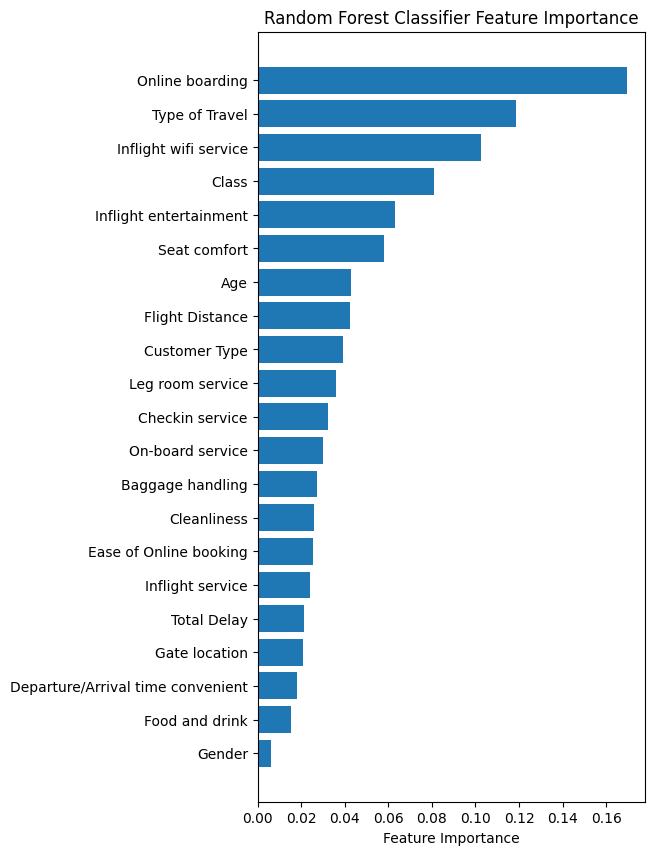

In [10]:
# Create a subplot with desired aspect ratio
fig, ax = plt.subplots(figsize=(5, 10))  # Adjust the size here (width, height)

# Plot feature importance
importances = best_rfc_model.feature_importances_
indices = np.argsort(importances)[::-1]
ax.barh(range(X_train.shape[1]), importances[indices], align='center')
ax.set_yticks(range(X_train.shape[1]))
ax.set_yticklabels([X_train.columns[i] for i in indices])
ax.invert_yaxis()  # Invert y-axis to have the most important feature at the top
ax.set_xlabel('Feature Importance')
ax.set_title('Random Forest Classifier Feature Importance')

plt.show()

## 6 Recommendations (Top 5 features)
### 6.1 Feature Analysis

In [11]:
df_copy=df.copy()

inverse_scaled_data = scaler.inverse_transform(df[columns_to_scale])

# Update columns with inverse scaled values
df_copy[columns_to_scale] = inverse_scaled_data

Text(0, 0.5, 'Count')

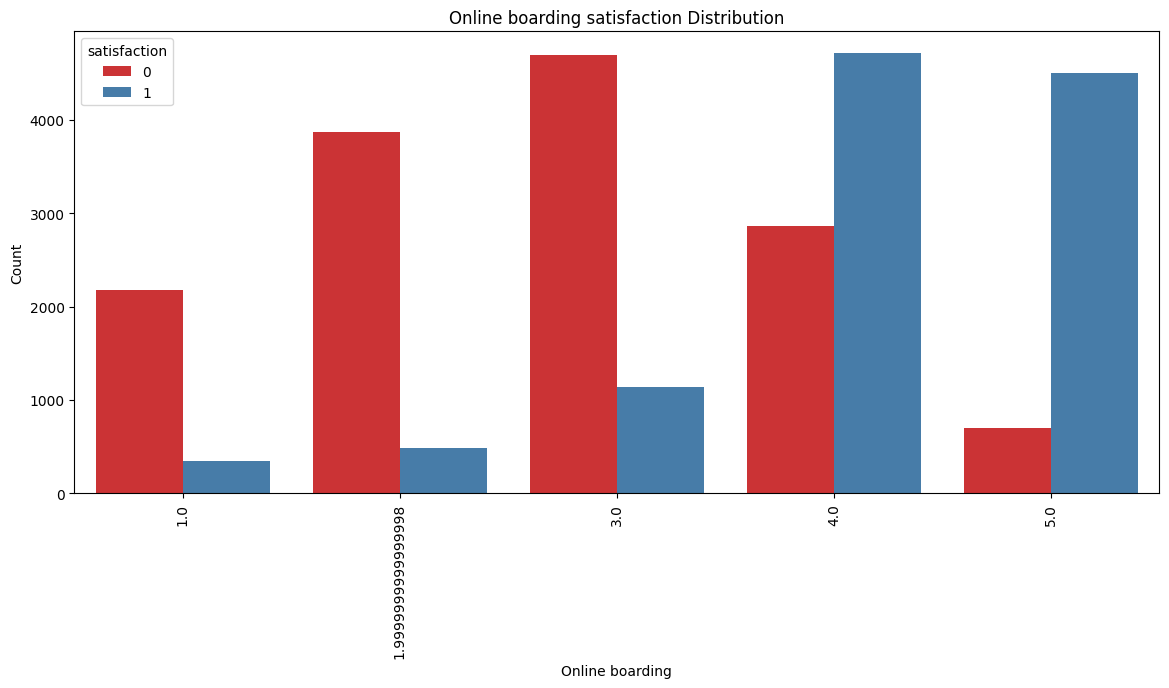

In [12]:
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_copy, x='Online boarding', hue='satisfaction', palette='Set1')
plt.title('Online boarding satisfaction Distribution')
plt.xlabel('Online boarding')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

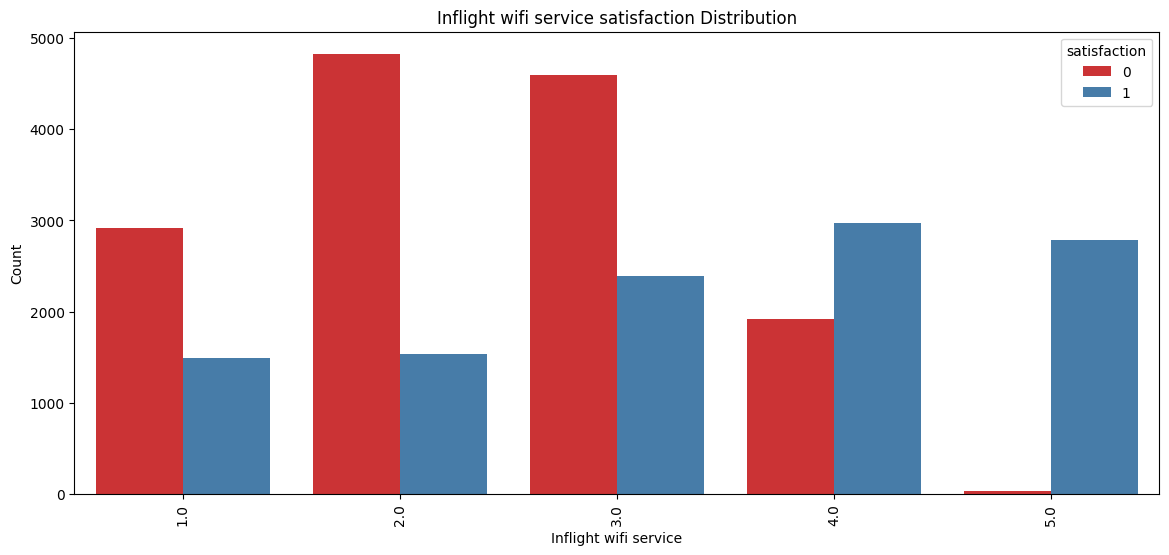

In [13]:
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_copy, x='Inflight wifi service', hue='satisfaction', palette='Set1')
plt.title('Inflight wifi service satisfaction Distribution')
plt.xlabel('Inflight wifi service')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

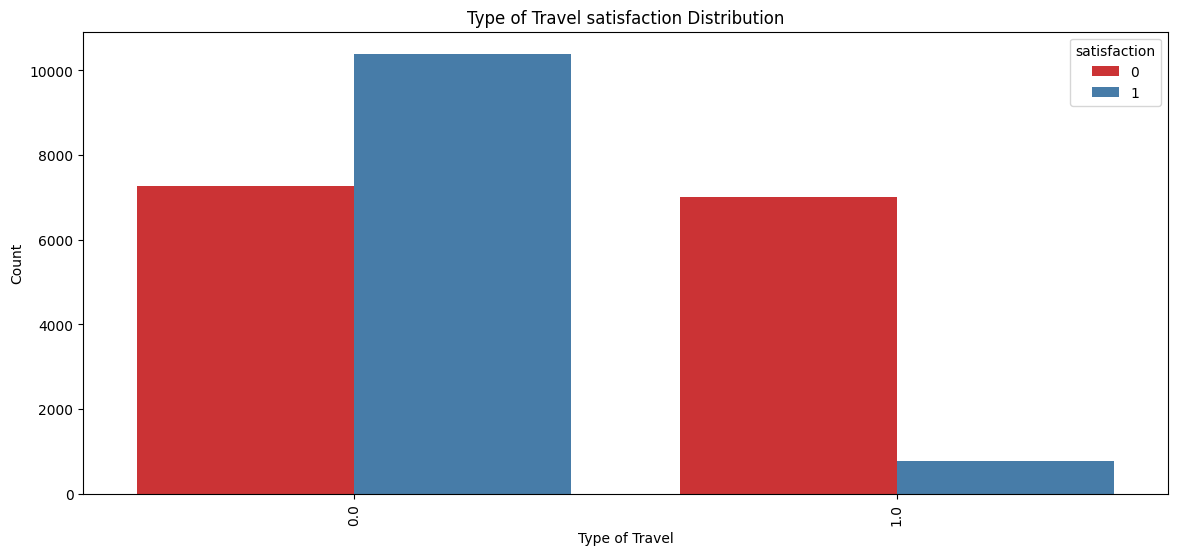

In [14]:
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_copy, x='Type of Travel', hue='satisfaction', palette='Set1')
plt.title('Type of Travel satisfaction Distribution')
plt.xlabel('Type of Travel')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

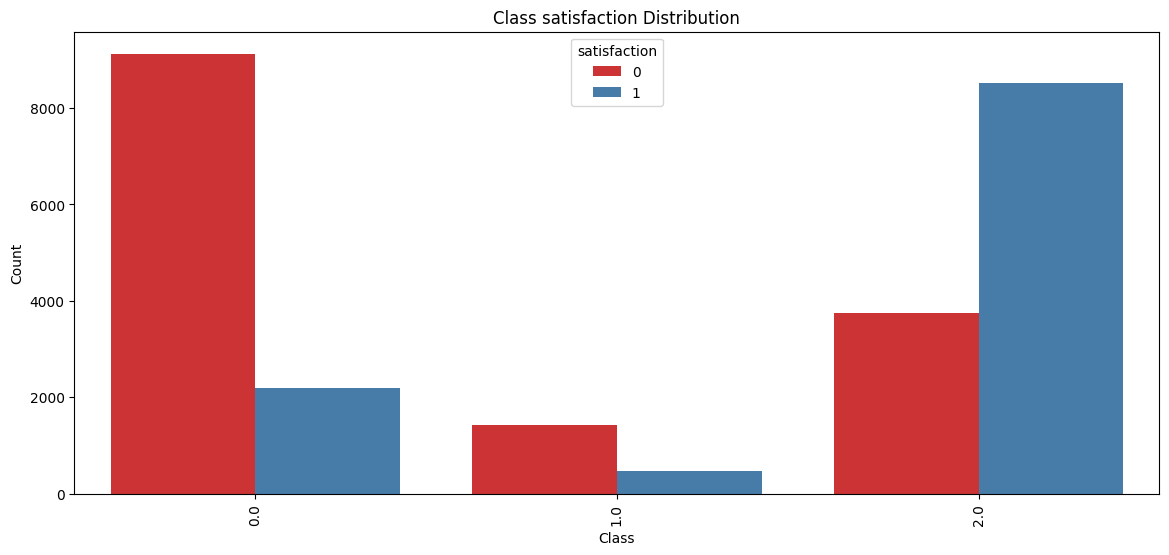

In [15]:
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_copy, x='Class', hue='satisfaction', palette='Set1')
plt.title('Class satisfaction Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

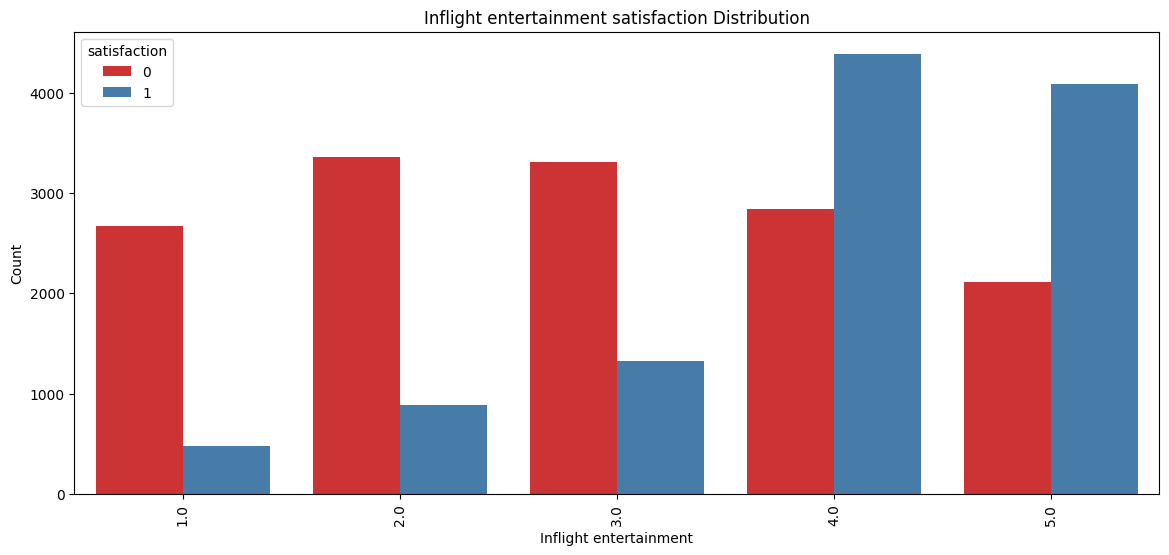

In [16]:
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_copy, x='Inflight entertainment', hue='satisfaction', palette='Set1')
plt.title('Inflight entertainment satisfaction Distribution')
plt.xlabel('Inflight entertainment')
plt.ylabel('Count')

### 6.2 Feature Tweaking

In [17]:
# Count occurrences where the column's value is True or 1
original_dissatisfaction = (df['satisfaction']==0).sum()

# Clone DataFrame for each experiment
Xf = df[columns_to_scale].copy()

# Update columns with inverse scaled values
Xf[columns_to_scale] = inverse_scaled_data


FallingShort_4 = Xf['Online boarding'] < 4
Xf.loc[FallingShort_4, 'Online boarding'] = 4
FallingShort_4 = Xf['Inflight wifi service'] < 4
Xf.loc[FallingShort_4, 'Inflight wifi service'] = 4
Xf['Type of Travel'] = 0
Xf['Class'] = 2
FallingShort_4 = Xf['Inflight entertainment'] < 4
Xf.loc[FallingShort_4, 'Inflight entertainment'] = 4

# Scale the modified data
Xf_scaled = scaler.transform(Xf)

# Predictions for each experiment
yf = best_rfc_model.predict(Xf_scaled)

# Calculate turnover for each experiment
new_ratingf = (yf == 0).sum()

# Output the results
print(f'Original dissatisfaction count: {original_dissatisfaction}')
print(f"Dissatisfaction count after combining the 5 recommendations: {new_ratingf}")
print(f'Original dissatisfaction rate : {(original_dissatisfaction/len(df))*100}%')
print(f'Dissatisfaction rate with the new recommendations : {(new_ratingf/len(df))*100}%')

Original dissatisfaction count: 14294
Dissatisfaction count after combining the 5 recommendations: 8981
Original dissatisfaction rate : 56.12533375215957%
Dissatisfaction rate with the new recommendations : 35.26386053086226%


C:\Users\Nadir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### 6.2.1 Analysis:
1. Initial Dissatisfaction Rate:
* The original dissatisfaction count is 14,294 out of a total dataset.
* This corresponds to an original dissatisfaction rate of 56.13%.

2. Adjustments Made:
The following features were targeted for improvement if their values were below a certain threshold:
* Online boarding: Set a minimum value of 4.
  - Inflight wifi service: Set a minimum value of 4.
  - Inflight entertainment: Set a minimum value of 4.
* The Type of Travel was set to 0, which might correspond to a specific type such as "Personal Travel" or "Business Travel."
* The Class was set to 2, possibly corresponding to a specific class like "Economy," "Business," or "First."

3. Results After Adjustments:
- After applying these changes, the dissatisfaction count dropped to 8,981.
- This results in a new dissatisfaction rate of 35.26%.

#### 6.2.2 Recommendations:
1. Focus on Key Areas:
* **Online Boarding:** Ensuring an online boarding score of at least 4 can significantly reduce dissatisfaction. The airline should look into ways to improve the online boarding process, perhaps by simplifying the online check-in process, providing clearer instructions, or improving the user interface of the boarding system.
* **Inflight WiFi Service:** Ensuring that inflight WiFi service is consistently rated 4 or higher indicates a strong demand for reliable and high-speed internet access. The airline should invest in better WiFi infrastructure or offer free WiFi services.
* **Inflight Entertainment:** Maintaining a minimum entertainment rating of 4 suggests that quality inflight entertainment is crucial. The airline should consider updating its content library, offering a variety of options, and ensuring the entertainment system is user-friendly and functional.

2. Class and Travel Type:
* **Class:** Setting the class to 2 (buisness class) suggests that passengers in higher classes are more satisfied. Offering upgrades, better services in 'economy and 'economy plus' classes, or promoting higher-class tickets with added benefits could improve satisfaction.
* **Type of Travel:** If setting the type of travel to 0 corresponds to a specific travel type (business travel), it indicates that targeting this demographic can improve satisfaction. The airline should consider tailoring services and offers to this type of traveler.

3. Continuous Monitoring and Feedback:
* Continuously monitor these key features and gather passenger feedback to identify areas needing improvement.
* Implement regular surveys or feedback mechanisms to stay updated with passenger expectations and pain points.

4. Employee Training:
* Train staff to provide exceptional service, especially in areas impacting the highlighted features like online boarding assistance, inflight WiFi troubleshooting, and entertainment system support.
By implementing these recommendations, the airline can work towards further reducing dissatisfaction and improving overall passenger satisfaction.

# Conclusion
Through thorough data analysis and model refinement, I aimed to enhance airliner satisfaction. By identifying key features and making strategic adjustments, I successfully reduced dissatisfaction count and improved overall passenger satisfaction.

My work focused on online boarding satisfaction, type of travel, class, inflight wifi service satisfaction, and customer type. By increasing satisfaction levels and capping dissatisfaction for specific passenger segments, I addressed underlying issues and improved the passenger experience.

The substantial reduction in dissatisfaction count by 5,439 instances reflects the impact of our approach. Moreover, the significant decrease in dissatisfaction rate from 56.13% to 34.77% underscores the outcomes of the project.

Moving forward, it's essential to continue gathering passenger feedback to sustain these improvements. By staying responsive to passenger preferences, I can ensure enduring satisfaction and foster loyalty among travelers.

This project demonstrates the effectiveness of data-driven insights and targeted interventions in enhancing airliner satisfaction, ultimately enriching the travel experience for passengers.